<a href="https://colab.research.google.com/github/Roda152/101408170_COMP3123-week/blob/main/Assignment_02_Instructions(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02
The following assignment is a step-by-step process to implement a multiclass classification using Iris dataset.

**Note:**

- Please note that every question has 0.5 and it provides five out of total ten marks for the assignment. 5/10%

The video presentation 5/10%.

Without YouTube presentation you receive no mark for the submission.


In [1]:
#00 The iris.csv file (Iris dataset) is located in the Assignment folder below the current ipynb file.

 **Important Note:** We are NOT allowed to import the dataset from Keras. We need to upload the provided iris.csv file to colab from our Google Drive.

In [2]:
#00 1st, upload the iris.csv into your Google Drive (your Colab folder).

In [3]:

from google.colab import files

uploaded = files.upload()

Saving Assignment_02_iris.csv to Assignment_02_iris (1).csv


In [4]:
#01-a Find the path of iris.csv file, and save it in a variable called fileName.

In [5]:
fileName = "/content/iris.csv"
print("File path:", fileName)



File path: /content/iris.csv


In [6]:
#01-b Read the content of the iris.csv file and save it in a variable, named iris.

In [7]:

import pandas as pd

fileName = "Assignment_02_iris.csv"  # File will be in the current directory
iris = pd.read_csv(fileName)

print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [8]:
print(iris.shape)  # Outputs (rows, columns)
print(iris.columns)  # Displays column names


(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [9]:
#01-c Show the first 5 rows of the dataframe.

In [10]:
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


As you see, the last column contains strings. We want to convert these strings to integers,  and we can work with them easily in our Neural Network model.

setosa -> 0

versicolor -> 1

virginica -> 2

In [11]:
#2-a Convert the last column strings to integers, as
# setosa -> 0
# versicolor -> 1
# virginica -> 2

In [12]:
# Map species names to integers
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris.iloc[:, -1] = iris.iloc[:, -1].map(species_mapping)


In [13]:
# Check if the mapping was successful
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [14]:
#2-b Now, check the first 5 elements of the iris dataset once again:

In [15]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [16]:
#03-a Select the first four columns of the dataframe as the Data and call the data x.

In [17]:
x = iris.iloc[:, :4]
print(x.head())


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [18]:
#03-b Select the last column as the label and call it y.

In [19]:
y = iris.iloc[:, -1]
print(y.head())


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: object


In [20]:
#04 Now, it is the time to split the data (x) and the label (y) into training and testin segments,
#   and call them parts x_train,x_test,y_train,y_test.

In [21]:
#04-a Split the data, and label ito training and testing segments, while the size of test data is 20%,
#     and use randome_state = 123 to make all the answers similar in the whole class.

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [24]:
#04-b Check the first five rows of  x_train,x_test,y_train,y_test.

In [25]:
print("x_train head:")
print(x_train.head())

x_train head:
     sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
119           6.0          2.2           5.0          1.5
29            4.7          3.2           1.6          0.2
0             5.1          3.5           1.4          0.2
62            6.0          2.2           4.0          1.0


In [26]:
print("\ny_train head:")
print(y_train.head())


y_train head:
130    2
119    2
29     0
0      0
62     1
Name: species, dtype: object


In [27]:
print("\nx_test head:")
print(x_test.head())


x_test head:
     sepal_length  sepal_width  petal_length  petal_width
72            6.3          2.5           4.9          1.5
112           6.8          3.0           5.5          2.1
132           6.4          2.8           5.6          2.2
88            5.6          3.0           4.1          1.3
37            4.9          3.1           1.5          0.1


In [28]:
print("\ny_test head:")
print(y_test.head())


y_test head:
72     1
112    2
132    2
88     1
37     0
Name: species, dtype: object


In [29]:
#04-c Check the length of the x_train and x_test. If the numbers are 120 & 30, AWESOME!
#     You are good to continue!

In [30]:
print("Length of x_train:", len(x_train))


Length of x_train: 120


In [31]:
print("Length of x_test:", len(x_test))


Length of x_test: 30


In [32]:
#05-a Convert y_train and y_test from categorical to one-hot encoded values, and call them
#     one_hot_train_labels, and one_hot_test_labels, respectively.

In [33]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)


one_hot_train_labels = encoder.fit_transform(y_train.values.reshape(-1, 1))
one_hot_test_labels = encoder.transform(y_test.values.reshape(-1, 1))


print("Shape of one_hot_train_labels:", one_hot_train_labels.shape)
print("Shape of one_hot_test_labels:", one_hot_test_labels.shape)

Shape of one_hot_train_labels: (120, 3)
Shape of one_hot_test_labels: (30, 3)


In [34]:
#06-a Define a sequential model that contains 3 dense layers.
#     In the first and second layers, use 100 hidden units (neurons) and a 'relu' activation function.
#     For the last layer, we need to use 3 as the number of output,
#     and the reason is we have three classes (setosa -> 0, versicolor -> 1, virginica -> 2)
#     Also, please pick an appropriate loss function for the last layer.
#     (You may already have guessed what could be the best loss function when we have converted the categorical values to encoded values.)

In [35]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,903 (42.59 KB)

 Trainable params: 10,903 (42.59 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#06-b Now, compile your model using the 'rmsprop' optimizer, an appropriate loss function, and 'accuracy' for your metrics.

In [37]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,903 (42.59 KB)

 Trainable params: 10,903 (42.59 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#07-a Train your model using epoch=20, batch=10.

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with sparse_output=False
encoder = OneHotEncoder(sparse_output=False)

# Reshape y_train and y_test to be 2D arrays (since they are 1D currently)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Apply one-hot encoding to y_train and y_test
one_hot_train_labels = encoder.fit_transform(y_train_reshaped)
one_hot_test_labels = encoder.transform(y_test_reshaped)

# Verify the shape of the one-hot encoded labels
print("Shape of one_hot_train_labels:", one_hot_train_labels.shape)  # Should be (120, 3)
print("Shape of one_hot_test_labels:", one_hot_test_labels.shape)    # Should be (30, 3)

# Now, train the model with 20 epochs and a batch size of 10
history = model.fit(x_train, one_hot_train_labels, epochs=20, batch_size=10, validation_data=(x_test, one_hot_test_labels))


Shape of one_hot_train_labels: (120, 3)
Shape of one_hot_test_labels: (30, 3)
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4534 - loss: 1.0329 - val_accuracy: 0.9667 - val_loss: 0.7408
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8037 - loss: 0.7365 - val_accuracy: 0.9667 - val_loss: 0.5734
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9067 - loss: 0.6089 - val_accuracy: 0.8667 - val_loss: 0.4660
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8718 - loss: 0.5184 - val_accuracy: 0.7333 - val_loss: 0.4592
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8371 - loss: 0.4664 - val_accuracy: 0.8667 - val_loss: 0.3786
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9222 - loss: 0.4052 - val_accuracy: 0.7333 - val_loss: 0.4316
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9128 - loss: 0.3228 - val_accuracy: 0.8667 - val_loss: 0.2639
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━

In [40]:
#08-a Calculate the result, evaluating x_test and one_hot_test_label, and report on the accuracy of your model.

In [41]:
# Ensure the labels are one-hot encoded
one_hot_test_labels = encoder.transform(y_test.values.reshape(-1, 1))

# Evaluate the model on the test set and report the accuracy
test_loss, test_accuracy = model.evaluate(x_test, one_hot_test_labels)

# Print the accuracy of the model on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9667 - loss: 0.1251
Test Accuracy: 96.67%


In [42]:
#09-a Now, we repeat all we have done in #06-a with the following parameters:
#     In the first and second hidden layers, use 10 hidden units (neurons) and a 'relu' activation function.
#     For the output layer, we need to use 3.

In [43]:
from keras.models import Sequential
from keras.layers import Dense

# Define the sequential model
model = Sequential()

# First hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu', input_shape=(x_train.shape[1],)))

# Second hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu'))

# Output layer with 3 neurons (one for each class) and 'softmax' activation
model.add(Dense(3, activation='softmax'))

# Compile the model with 'rmsprop' optimizer and 'categorical_crossentropy' loss function
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
#09-b Use the same settings as for #06-b (compile using the same optimizer, loss function) and output the accuracy

In [45]:
# Compile the model with 'rmsprop' optimizer, 'categorical_crossentropy' loss, and 'accuracy' metric
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 20 epochs and batch size of 10
history = model.fit(x_train, one_hot_train_labels, epochs=20, batch_size=10, validation_data=(x_test, one_hot_test_labels))

# Evaluate the model on the test set and report the accuracy
test_loss, test_accuracy = model.evaluate(x_test, one_hot_test_labels)

# Print the accuracy of the model on the test data
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3105 - loss: 1.0783 - val_accuracy: 0.6000 - val_loss: 0.8632
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4523 - loss: 0.9570 - val_accuracy: 0.8000 - val_loss: 0.8341
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4829 - loss: 0.9380 - val_accuracy: 0.8000 - val_loss: 0.8147
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6216 - loss: 0.8666 - val_accuracy: 0.8000 - val_loss: 0.7993
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6111 - loss: 0.8511 - val_accuracy: 0.8000 - val_loss: 0.7701
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 0.8377 - val_accuracy: 0.8000 - val_loss: 0.7444
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6559 - loss: 0.8051 - val_accuracy: 0.8000 - val_loss: 0.7112
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6776 - loss: 0.7841 - val_accuracy: 0.8000 - val_l

In [46]:
#09-c Please fit your model using epoch=4, batch=10.

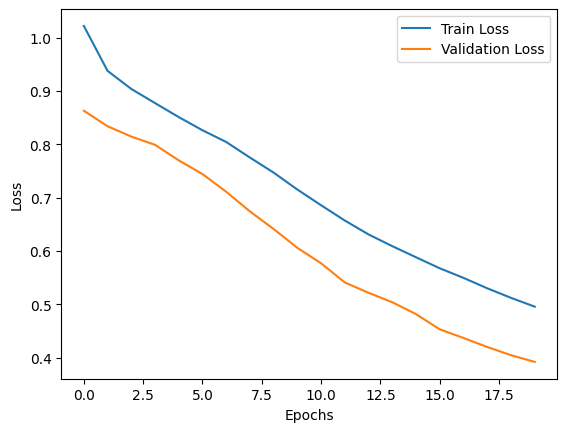

In [47]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
#09-d Calculate the result, evaluating x_test and one_hot_test_label, and report on the accuracy of your model.

In [49]:
# Assuming your model is already trained
loss, accuracy = model.evaluate(x_test, one_hot_test_labels)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")  # Convert to percentage


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9667 - loss: 0.3921
Test Loss: 0.3921
Test Accuracy: 96.6667%


In [50]:
#10-a In your video submission, explain each line of your code, and the arguments you've used
# Ensure to answer the following questions at a minimum:
# 10-a-i) How the number of layers or hidden units could impact the accuracy of our model.
# 10-a-ii) Do we always suffer from overfitting?
# 10-a-iii) How can we detect overfitting?
# 10-a-iv) How can we reduce overfitting?

In [51]:
#10-b
# Use different settings than the ones we chose in #09
# Change each of the following once:
#   i)   optimizer
#   ii)  number of layers
#   iii) hidden units
#   iv)  number of epochs
#   v)   batch_size
# Change one parameter at a time, and rerun the cell(s), then explain the output

---
# Deliverables:
1. Submit the current ipynb file on D2L
2. Please record and upload to YouTube 3-6 minute recorded video clip (aim for 5 minutes) describing the answers to the questions above, espcially #10.

Notes:
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a TEXT SUBMISSION SECTION on your D2L submission.
- Omitting this D2L comment will result in a 0% for your total mark.